In [19]:
# !pip install avalanche-lib==0.2.0

In [20]:
import avalanche as avl
import torch
from avalanche.evaluation import metrics as metrics

In [21]:
is_multitask = True

In [22]:
# load a benchmark

benchmark = avl.benchmarks.SplitMNIST(
    n_experiences=5, # continual learning; 5 experiences, 2 digits/classes per experience
    return_task_id=is_multitask, # set to True for multi-task experiments
    seed=0
)

In [23]:
# initialize a learning model

model = avl.models.SimpleMLP( # multi-layer perceptron
    input_size = 784, # dimensions of input data
    hidden_size = 256, # how many neurons in the hidden layer
    hidden_layers = 2, # how many hidden layers
    drop_rate = 0.5,
    num_classes = 10 # how many classes; 10 classes for MNIST
)

if is_multitask: 
    model = avl.models.as_multitask(model, 'classifier') # command to convert the SimpleMLP model into a multi-task model

In [24]:
# initialize evaluation metrics

interactive_logger = avl.logging.InteractiveLogger()

evaluation_plugin = avl.training.plugins.EvaluationPlugin(
    metrics.accuracy_metrics(experience=True), # report accuracy score for each experience
    metrics.forgetting_metrics(experience=True), # report forgetting score for each experience
    loggers=[interactive_logger]
)

/home/alex/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/avalanche/training/plugins/evaluation.py:82: UserWarning: No benchmark provided to the evaluation plugin. Metrics may be computed on inconsistent portion of streams, use at your own risk.
  "No benchmark provided to the evaluation plugin. "


In [25]:
# initialize a learning strategy

cl_strategy = avl.training.Naive(
    model = model, # learning model, i.e. MLP
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001), # optimizer for MLP parameters
    criterion = torch.nn.CrossEntropyLoss(), # loss criterion for optimizer
    train_mb_size = 64, # how many training samples per mini-batch
    train_epochs = 3, # how many training epochs per mini-batch
    evaluator = evaluation_plugin
)

In [26]:
# begin training and testing

results = []
for experience in benchmark.train_stream:
    print("Current Experience: ", experience.current_experience)
    cl_strategy.train(experience)
    results += [cl_strategy.eval(benchmark.test_stream)]

Current Experience:  0
-- >> Start of training phase << --
100%|█████████████████████████████████████████| 197/197 [00:04<00:00, 46.08it/s]
Epoch 0 ended.
100%|█████████████████████████████████████████| 197/197 [00:04<00:00, 46.20it/s]
Epoch 1 ended.
100%|█████████████████████████████████████████| 197/197 [00:04<00:00, 46.83it/s]
Epoch 2 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|███████████████████████████████████████████| 34/34 [00:00<00:00, 53.06it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.9877
-- Starting eval on experience 1 (Task 0) from test stream --
100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 52.46it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.0000
-- Starting eval on experience 2 (Task 0) from test stream --
100%|

100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 53.82it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	ExperienceForgetting/eval_phase/test_stream/Task000/Exp001 = 0.9609
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.0000
-- Starting eval on experience 2 (Task 0) from test stream --
100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 54.22it/s]
> Eval on experience 2 (Task 0) from test stream ended.
	ExperienceForgetting/eval_phase/test_stream/Task000/Exp002 = 0.9658
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp002 = 0.0000
-- Starting eval on experience 3 (Task 0) from test stream --
100%|███████████████████████████████████████████| 31/31 [00:00<00:00, 52.78it/s]
> Eval on experience 3 (Task 0) from test stream ended.
	ExperienceForgetting/eval_phase/test_stream/Task000/Exp003 = 0.9724
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp003 = 0.0000
-- Starting eval on experience 4 (Task 0) from test stream --
100%|████████

In [27]:
results[0]

{'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000': 0.9877184695323571,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp002': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp003': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp004': 0.0}

In [28]:
results[1]

{'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001': 0.9609375,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp002': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp003': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp004': 0.0,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp000': 0.9877184695323571}

In [29]:
results[2]

{'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp002': 0.9658246656760773,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp003': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp004': 0.0,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp000': 0.9877184695323571,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp001': 0.9609375}

In [30]:
results[3]

{'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp002': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp003': 0.9723643807574207,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp004': 0.0,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp000': 0.9877184695323571,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp001': 0.9609375,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp002': 0.9658246656760773}

In [31]:
results[4]

{'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp002': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp003': 0.0,
 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp004': 0.9552763819095478,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp000': 0.9877184695323571,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp001': 0.9609375,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp002': 0.9658246656760773,
 'ExperienceForgetting/eval_phase/test_stream/Task000/Exp003': 0.9723643807574207}

In [32]:
# plot results

import matplotlib.pyplot as plt
import numpy as np

acc0 = []
acc1 = []
acc2 = []
acc3 = []
acc4 = []

for0 = []
for1 = []
for2 = []
for3 = []

for a in results:
    for b in a:
        c = b.split("/")
        if (c[0] == "Top1_Acc_Exp") and (c[-1]=="Exp000"):
            acc0 += [a[b]]
        elif (c[0] == "Top1_Acc_Exp") and (c[-1]=="Exp001"):
            acc1 += [a[b]]
        elif (c[0] == "Top1_Acc_Exp") and (c[-1]=="Exp002"):
            acc2 += [a[b]]
        elif (c[0] == "Top1_Acc_Exp") and (c[-1]=="Exp003"):
            acc3 += [a[b]]
        elif (c[0] == "Top1_Acc_Exp") and (c[-1]=="Exp004"):
            acc4 += [a[b]]
        elif (c[0] == "ExperienceForgetting") and (c[-1]=="Exp000"):
            for0 += [a[b]]
        elif (c[0] == "ExperienceForgetting") and (c[-1]=="Exp001"):
            for1 += [a[b]]
        elif (c[0] == "ExperienceForgetting") and (c[-1]=="Exp002"):
            for2 += [a[b]]
        elif (c[0] == "ExperienceForgetting") and (c[-1]=="Exp003"):
            for3 += [a[b]]

acc0 = np.array(acc0)
acc1 = np.array(acc1)
acc2 = np.array(acc2)
acc3 = np.array(acc3)
acc4 = np.array(acc4)
for0 = np.array(for0)
for1 = np.array(for1)
for2 = np.array(for2)
for3 = np.array(for3)

In [33]:
while len(for0) < 5:
    for0 = np.concatenate((np.zeros(1), for0))

while len(for1) < 5:
    for1 = np.concatenate((np.zeros(1), for1))

while len(for2) < 5:
    for2 = np.concatenate((np.zeros(1), for2))
    
while len(for3) < 5:
    for3 = np.concatenate((np.zeros(1), for3))

In [34]:
experience = np.array(range(5))

[[<matplotlib.lines.Line2D at 0x7fe82d1a5dd0>],
 Text(0.5, 0, 'training experience'),
 ([<matplotlib.axis.XTick at 0x7fe846c88fd0>,
  [Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, '')]),
 Text(0, 0.5, 'experience testing accuracy'),
 Text(0.5, 1.0, 'Testing Accuracy')]

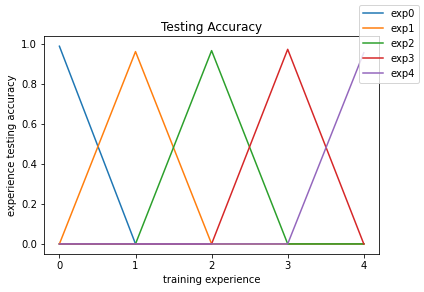

In [35]:
[plt.plot(experience, acc0, label='exp0'),
 plt.plot(experience, acc1, label='exp1'),
 plt.plot(experience, acc2, label='exp2'),
 plt.plot(experience, acc3, label='exp3'),
 plt.plot(experience, acc4, label='exp4'),
 plt.xlabel("training experience"), 
 plt.xticks([0,1,2,3,4]),
 plt.ylabel("experience testing accuracy"),
 plt.figlegend(),
 plt.title("Testing Accuracy")
]

[[<matplotlib.lines.Line2D at 0x7fe82d10cb50>],
 Text(0.5, 0, 'training experience'),
 ([<matplotlib.axis.XTick at 0x7fe82d1cc490>,
  [Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, '')]),
 Text(0, 0.5, 'experience forgetting'),
 Text(0.5, 1.0, 'Forgetting score')]

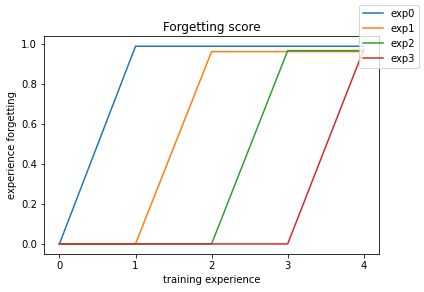

In [36]:
[plt.plot(experience, for0, label='exp0'),
 plt.plot(experience, for1, label='exp1'),
 plt.plot(experience, for2, label='exp2'),
 plt.plot(experience, for3, label='exp3'),
 plt.xlabel("training experience"), 
 plt.xticks([0,1,2,3,4]),
 plt.ylabel("experience forgetting"),
 plt.figlegend(),
 plt.title("Forgetting score")
]